Demonstration of block-encoding circuits for banded circulant matrices.

Cambridge Consultants 2024\
Walden Killick

The first step in performing matrix inversion by QSVT is to construct a quantum circuit which efficiently encodes the matrix $A$ of interest. This is achieved via a _block encoding_: a unitary $U_A$ for which the top-left submatrix is equal to (an appropriately scaled version of) $A$:
$$
U_A = \begin{bmatrix} A & \cdot \\\ \cdot & \cdot \end{bmatrix}.
$$
Such a matrix has the defining property that $(\bra{0} \otimes I) U_A (\ket{0} \otimes I) = A$. In other words, if we apply start with a state $\ket{0}\ket{b}$, apply $U_A$, then measure $\ket{0}$ on the first qubit, the remaining state is equal to (an appropriately scaled version of) $A \ket{b}$. The idea behind matrix inversion by QSVT is then to transform $U_A$ to (approximately) a block-encoding of $A^{-1}$ and apply the above procedure to yield the state $A^{-1} \ket{b}$.

This notebook demonstrates how to construct $U_A$ for a particular class of matrices known as _banded circulant_ matrices. Such matrices are the adjacency matrices of cycle graphs. The implementations used in the `BandedCirculantOracle` class are based on the constructions presented by [Camps et al](https://doi.org/10.1137/22M1484298).

In [1]:
from qce24_qre_challenge.circuit import BlockEncoding
from qce24_qre_challenge.quantum_oracle import BandedCirculantOracle
from qce24_qre_challenge.sparse_matrix import BandedCirculantMatrix

In [2]:
# Side length of the matrix to be block-encoded.
size = 8

In [3]:
# Random matrix entries will be generated if the coefficients argument is left blank.
matrix = BandedCirculantMatrix(size)
banded_circulant_oracle = BandedCirculantOracle(matrix)

To create the full block-encoding, we need two quantum circuits (oracles); one which locates the non-zero entries of the sparse matrix and another which computes their values. The `location_oracle()` and `value_oracle()` methods can be called on `SparseOracle` objects to return these circuits. In the aforementioned paper which these implementations are based on, these oracles are denoted $O_c$ and $O_A$, respectively. 

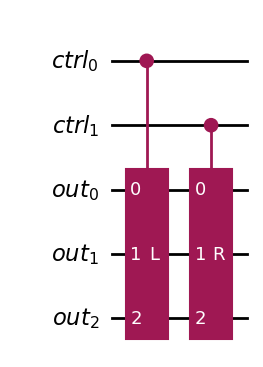

In [4]:
location_oracle_circuit = banded_circulant_oracle.location_oracle()
location_oracle_circuit.draw('mpl')

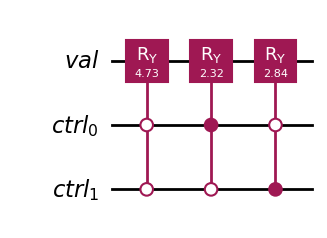

In [5]:
value_oracle_circuit = banded_circulant_oracle.value_oracle()
value_oracle_circuit.draw('mpl')

`SparseOracle` objects can be used to initialise a `BlockEncoding` object, which uses the $O_c$ and $O_A$ circuits to construct the full block-encoding circuit. [Camps et al.](https://doi.org/10.1137/22M1484298) show that
$$
U_A = (I_2 \otimes H^{\otimes m} \otimes I_N)(I_2 \otimes O_c) O_A (I_2 \otimes H^{\otimes m} \otimes I_N)
$$
block-encodes $A$, which is exactly how we construct our circuit.

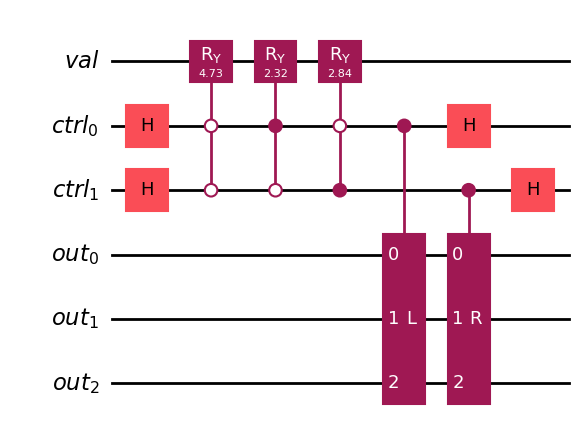

In [6]:
block_encoding = BlockEncoding(banded_circulant_oracle)
block_encoding_circuit = block_encoding.create_circuit()
block_encoding_circuit.draw('mpl')

In the [following notebook](https://github.com/Walden-Killick/QCE24-QRE-Challenge/blob/main/notebooks/demonstrations/2_qsvt_demo.ipynb), we show how block encodings are used to instantiate `QSVT` objects and perform polynomial transformations on the input matrix $A$.